In [2]:
import pandas as pd, numpy as np

In [6]:
def alpha_annotation(df, sp_list, wt_growth_labels, com_growth_labels):
    num_species = len(sp_list)

    for i in range(num_species):
        sp = sp_list[i]
        wt_col = df[wt_growth_labels[i]]
        com_col = df[com_growth_labels[i]]

        #alpha
        df['alpha_'+str(sp)] = (com_col - wt_col)*100/wt_col
    return df

In [2]:
data = pd.read_csv('examplefor_alpha.csv')
data.head()

,cycle,model_1_com,model_2_com,model1_wt,model2_wt
0,0,0.010000,0.010000,0.010000,0.010000
1,1,0.020575,0.039824,0.020575,0.039824
2,2,0.040055,0.136673,0.042330,0.141260
3,3,0.062291,0.292939,0.071482,0.303650
4,4,0.066462,0.394236,0.094051,0.419813


In [7]:
anndata = alpha_annotation(data, [1,2], ['model1_wt','model2_wt'], ['model_1_com','model_2_com'])
anndata.head()

,cycle,model_1_com,model_2_com,model1_wt,model2_wt,alpha_1,alpha_2
0,0,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000
1,1,0.020575,0.039824,0.020575,0.039824,0.000000,0.000000
2,2,0.040055,0.136673,0.042330,0.141260,-5.373462,-3.247334
3,3,0.062291,0.292939,0.071482,0.303650,-12.858160,-3.527480
4,4,0.066462,0.394236,0.094051,0.419813,-29.334485,-6.092474


# technical replicates 20x10

## is history important?

In [5]:
import pandas as pd, matplotlib.pyplot as plt
import os

tech_rep = {}
fileslist = os.listdir("results200x20")

i=1
for file in fileslist:
    fpath = "results200x20/"+file
    tech_rep[i] = pd.read_csv(fpath)
    i+=1

In [120]:
fileslist

['biomass_data_seq_invasion20x20_csize20_techrep1.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep10.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep2.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep3.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep4.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep5.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep6.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep7.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep8.csv',
 'biomass_data_seq_invasion20x20_csize20_techrep9.csv']

In [ ]:
model_columns = [f'model{j}' for j in range(1, 21)]  

# Loop through each model column to create 20 plots
for model in model_columns:
    plt.figure(figsize=(10, 6))
    
    # Loop through each DataFrame tech_rep[i] to get data for the current model column
    for i in range(1, 11):
        # Assuming each tech_rep[i] is stored in a dictionary or list named tech_reps
        df = tech_rep[i]
        
        # Filter for rows where com_size is 20 and cycle > 39
        filtered_df = df[(df['com_size'] == 20)]# & (df['cycle'] > 39)]
        
        # Plot cycle vs. model data for the current tech_rep[i]
        plt.plot(filtered_df['cycle'], filtered_df[model], marker='o', linestyle='-', label=f'tech_rep[{i}]')
    
    # Customize plot for the current model
    plt.xlabel('Cycle')
    plt.ylabel('Value')  # Adjust label based on the actual data the model columns represent
    plt.title(f'Cycle vs. Value for {model} across tech_rep[i]')
    plt.legend()
    plt.grid(True)
    
    # Show plot for this model
    plt.show()


In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# List to collect biomass values for each model across replicates at cycle=50
biomass_data = {f'model{j}': [] for j in range(1, 21)}

# Loop through each technical replicate and extract biomass values for cycle=50
for i in range(1, 11):
    # Assuming each tech_rep[i] is stored in a dictionary or list named tech_reps
    df = tech_rep[i]
    
    # Filter for rows where cycle == 50
    end_cycle_df = df[(df['com_size'] == 20) & (df['cycle'] == 50)]
    
    # Append biomass values for each model to the corresponding list in biomass_data
    for model in biomass_data.keys():
        biomass_data[model].append(end_cycle_df[model].values[0])  # Assuming one row per model at cycle 50


In [125]:
meta = pd.read_csv('models20_metadata.csv')
meta.head()

,model_id,model_name
0,1,Actinomyces_odontolyticus_ATCC_17982
1,2,Bacteroides_eggerthii_DSM_20697
2,3,Bacteroides_ovatus_ATCC_8483
3,4,Bacteroides_thetaiotaomicron_VPI_5482
4,5,Bifidobacterium_longum_infantis_ATCC_15697


In [126]:
meta_dict = dict(zip(meta['model_id'], meta['model_name']))
meta_dict

{1: 'Actinomyces_odontolyticus_ATCC_17982',
 2: 'Bacteroides_eggerthii_DSM_20697',
 3: 'Bacteroides_ovatus_ATCC_8483',
 4: 'Bacteroides_thetaiotaomicron_VPI_5482',
 5: 'Bifidobacterium_longum_infantis_ATCC_15697',
 6: 'Butyrivibrio_fibrisolvens_16_4',
 7: 'Citrobacter_freundii_UCI_31',
 8: 'Clostridium_butyricum_DSM_10702',
 9: 'Escherichia_coli_O157_H7_str_Sakai',
 10: 'Escherichia_coli_str_K_12_substr_MG1655',
 11: 'Eubacterium_eligens_ATCC_27750',
 12: 'Faecalibacterium_prausnitzii_M21_2',
 13: 'Klebsiella_pneumoniae_pneumoniae_MGH78578',
 14: 'Lactococcus_lactis_subsp_lactis_Il1403',
 15: 'Listeria_grayi_DSM_20601',
 16: 'Micrococcus_luteus_NCTC_2665',
 17: 'Parabacteroides_merdae_ATCC_43184',
 18: 'Ruminococcus_albus_7',
 19: 'Serratia_liquefaciens_ATCC_27592',
 20: 'Staphylococcus_epidermidis_ATCC_12228'}

In [58]:
x_labels = meta['model_name']
biomass = {}
for model in biomass_data.keys():
    id = int(model.split('model')[1])
    model_name = meta_dict[id]
    biomass[model_name] = biomass_data[model]
    
    #biomass[model] = biomass_data[model]

C:\Users\sabh\AppData\Local\Temp\ipykernel_17344\3720758193.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(biomass.values(), labels=biomass_data.keys(), showfliers=True)


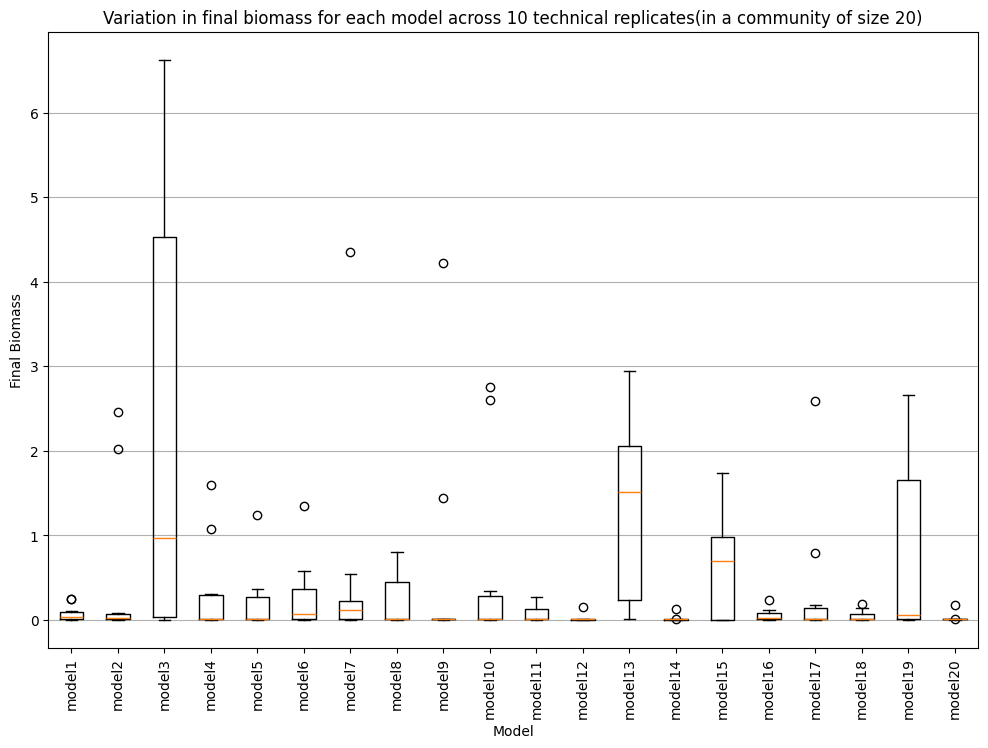

In [127]:
# Plot the biomass values using a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(biomass.values(), labels=biomass_data.keys(), showfliers=True)

# Customize plot
plt.xlabel('Model')
plt.ylabel('Final Biomass')
plt.title('Variation in final biomass for each model across 10 technical replicates(in a community of size 20)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

## calculate stability
Proportion of thriving species(threshold = 0.02)

In [133]:
models_list = [f'model{i}' for i in range(1, 21)]

In [149]:
def calculate_stability_stdev(row):
    # Calculate the standard deviation of biomass values for each model
    std_dev = np.std(row[1:])
    
    # Determine if the model is stable based on the standard deviation
    if std_dev < 0.05:
        return 'Stable'
    else:
        return 'Unstable'

# Calculate stability for each row - ratio of thriving species
def calculate_stability(row):
    count = 0
    for model in models_list:
        print(row[model], row['community_biomass'])
        sp_ratio = row[model] / row['community_biomass']
        print(sp_ratio)
        # Check if division is valid and result is non-zero
        if sp_ratio > 0.02:
            count += 1
    return count


In [158]:
for i in range(1, 11):
    # Calculate total community biomass
    tech_rep[i]['community_biomass'] = tech_rep[i][model_columns].sum(axis=1)
    
    print('Technical replicate', i, 'running...')
    # Calculate stability by iterating over each row
    stability_counts = []  # Temporary list to store stability values for each row
    for index, row in tech_rep[i].iterrows():
        thr_count = 0
        com_size = row['com_size']
        for model in model_columns:
            # Calculate species ratio and update column value in-place
            sp_ratio = row[model] / row['community_biomass']
            tech_rep[i].at[index, model] = sp_ratio
            
            # Count models where ratio exceeds the threshold
            if sp_ratio > 0.02:
                thr_count += 1
        stability_counts.append(thr_count/com_size)
    print('Technical replicate', i, 'completed!')
    # Assign stability counts as a new column
    tech_rep[i]['stability'] = stability_counts

Technical replicate 1 running...
Technical replicate 1 completed!
Technical replicate 2 running...
Technical replicate 2 completed!
Technical replicate 3 running...
Technical replicate 3 completed!
Technical replicate 4 running...
Technical replicate 4 completed!
Technical replicate 5 running...
Technical replicate 5 completed!
Technical replicate 6 running...
Technical replicate 6 completed!
Technical replicate 7 running...
Technical replicate 7 completed!
Technical replicate 8 running...
Technical replicate 8 completed!
Technical replicate 9 running...
Technical replicate 9 completed!
Technical replicate 10 running...
Technical replicate 10 completed!


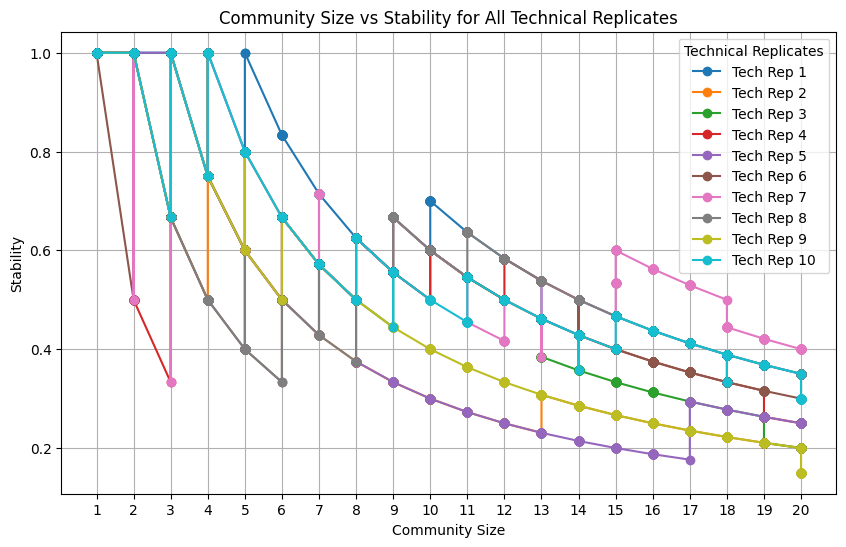

In [164]:
import matplotlib.pyplot as plt

# Create a single plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot each technical replicate in a loop on the same plot
for i in range(1, 11):
    tech_rep[i].plot(
        x='com_size', 
        y='stability', 
        kind='line', 
        marker='o', 
        linestyle='-', 
        label=f'Tech Rep {i}', 
        ax=plt.gca()  # Use the current axes for all plots
    )

# Set labels, title, and grid once for the combined plot
plt.xlabel('Community Size')
plt.ylabel('Stability')
plt.title('Community Size vs Stability for All Technical Replicates')
plt.legend(title="Technical Replicates")  # Add a legend with a title
plt.grid(True)
plt.xticks(range(1, 21))  # Set x-axis ticks to integers
plt.show()


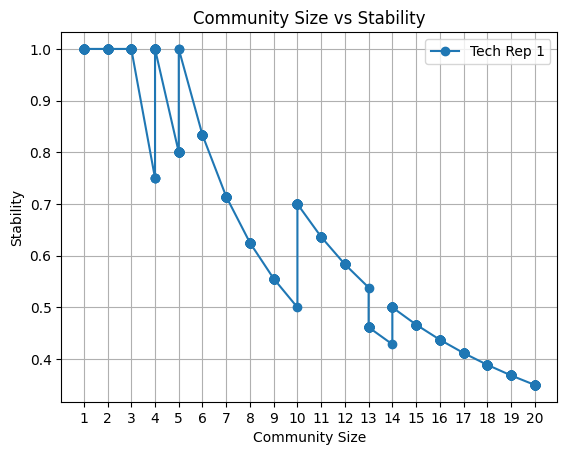

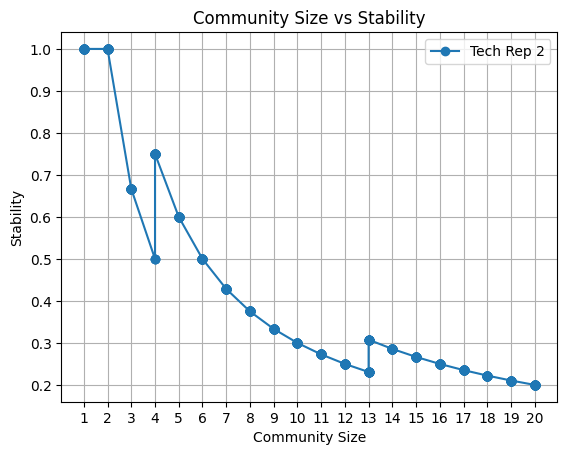

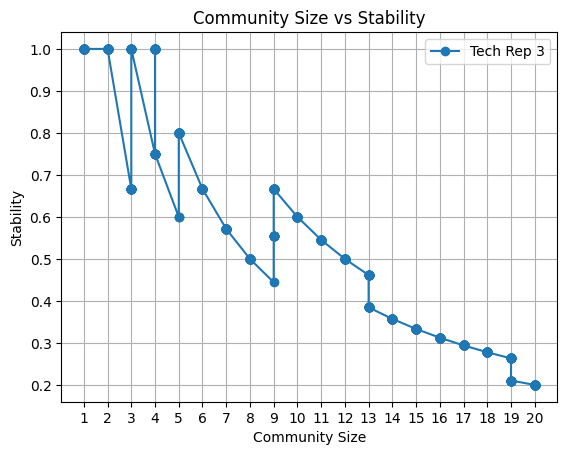

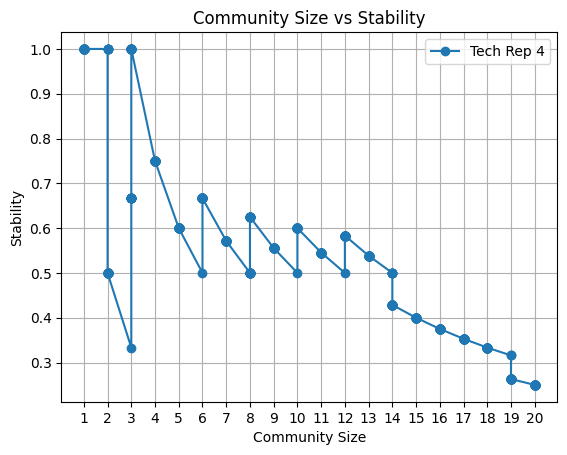

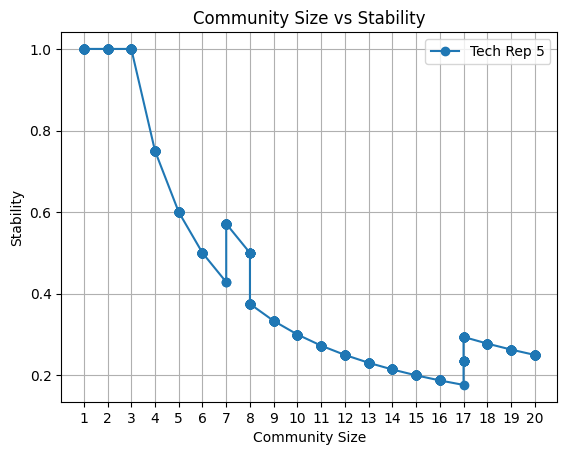

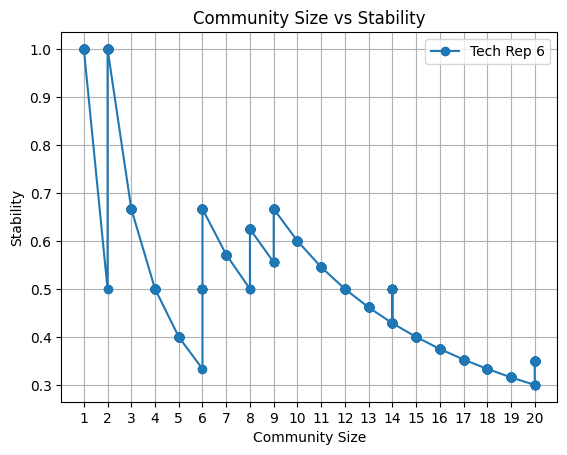

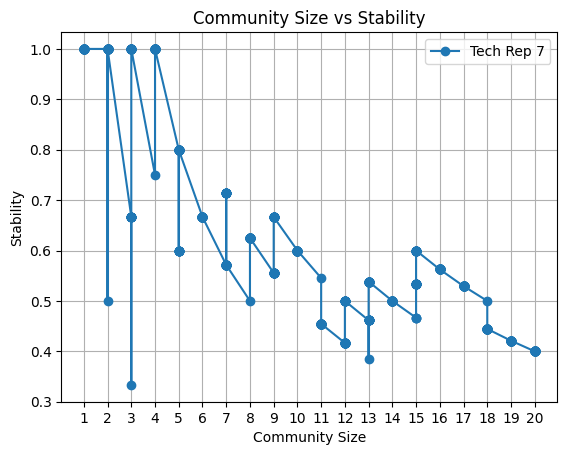

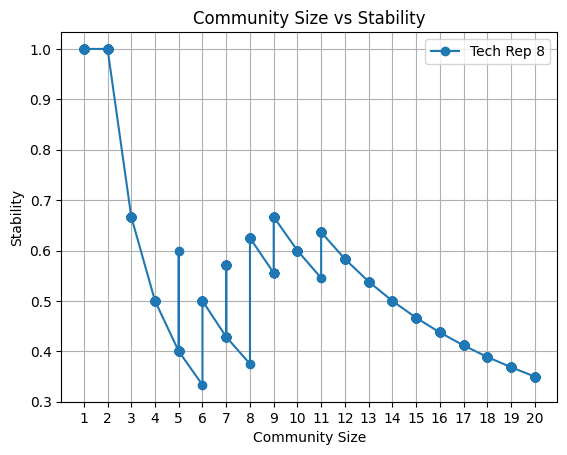

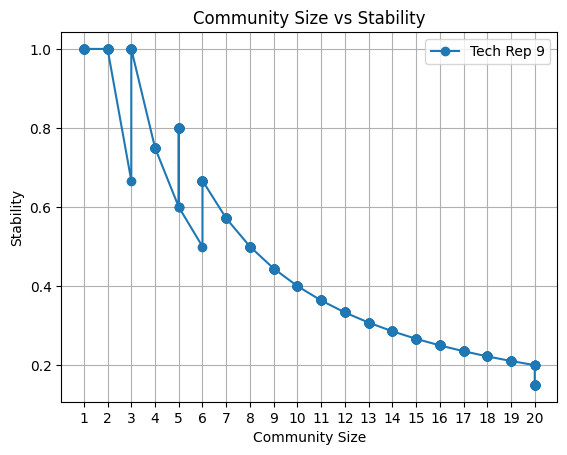

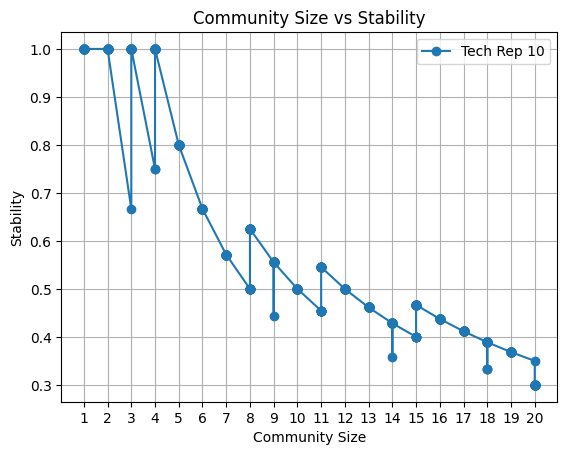

C:\Users\sabh\AppData\Local\Temp\ipykernel_17344\4190769990.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


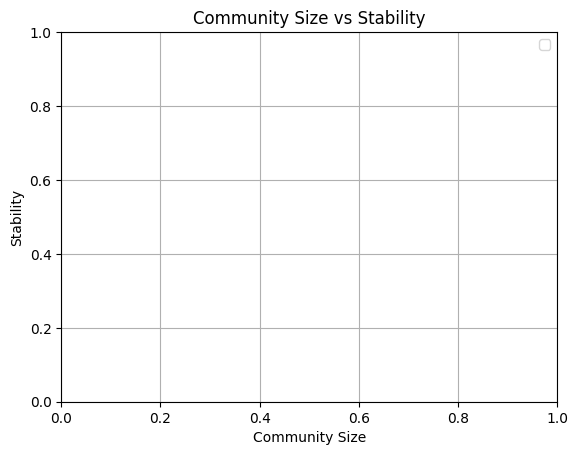

In [163]:
for i in range(1, 11):
    tech_rep[i].plot(x='com_size', y='stability', kind='line', marker='o', linestyle='-', label=f'Tech Rep {i}')
    plt.xlabel('Community Size')
    plt.ylabel('Stability')
    plt.title('Community Size vs Stability')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 21))  # Set the x-axis ticks to integers
    plt.show()
    
plt.xlabel('Community Size')
plt.ylabel('Stability')
plt.title('Community Size vs Stability')
plt.legend()
plt.grid(True)
plt.show()


# alpha values

In [38]:
model_columns = [f'model{j}' for j in range(1, 21)]
# update cycle number
for i in range(1,11):
    tech_rep[1]['updated_cycle'] = (tech_rep[1]['com_size'] - 1) * 50 + tech_rep[1]['cycle']

In [3]:
mono = pd.read_csv('biomass_df_monoculture20.csv')
mono.head()

,cycle,model1,model2,model3,model4,model5,model6,model7,model8,model9,...,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20
0,0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
1,1,0.020658,0.039907,0.027220,0.009983,0.031055,0.027066,0.046639,0.009983,0.050755,...,0.009983,0.009983,0.051007,0.009983,0.027066,0.017027,0.027220,0.009983,0.041911,0.009983
2,2,0.042672,0.141765,0.074091,0.009966,0.089126,0.073258,0.197823,0.009966,0.223298,...,0.009966,0.009966,0.214958,0.009966,0.073258,0.028990,0.074091,0.009966,0.164090,0.009966
3,3,0.072200,0.304329,0.154102,0.009949,0.152890,0.108349,0.435538,0.009949,0.524790,...,0.009949,0.009949,0.429183,0.009949,0.198282,0.043163,0.171657,0.009949,0.367068,0.009949
4,4,0.094785,0.421327,0.229189,0.009932,0.209833,0.111571,0.692677,0.009932,0.789469,...,0.009932,0.009932,0.629208,0.009932,0.256246,0.054924,0.241824,0.009932,0.467569,0.009932


In [39]:
#alpha annotation
for index, row in tech_rep[1].iterrows():
    up_cycle = int(row['updated_cycle'])
    #print('up_cycle', up_cycle) 
    #print(index)
    
    # Ensure up_cycle is within the index range of the mono DataFrame
    for model in model_columns:  # Update with actual model_columns
        wt_growth = mono[model].iloc[up_cycle]  # Access growth value for the corresponding cycle
        com_growth = row[model]
        #print(model, wt_growth, com_growth)
        alpha = np.nan
        id = int(model.split('model')[1])
    
        # Calculate alpha and update the tech_rep DataFrame
        if pd.notna(com_growth):  # Avoid division by zero
            #print('model', model)
            #print(model, model.split('model')[1])
            #print(id)
            #print('wt_growth:', wt_growth, 'com_growth:', com_growth)
            alpha = (com_growth - wt_growth) * 100 / wt_growth
            #print(id, 'alpha', alpha)
        #print('index', index, f'alpha{id}', alpha)
        tech_rep[1].at[index, f'alpha{id}'] = alpha  

In [43]:
import itertools
initial_int = {}
final_int = {}
species = range(1, 21)
combinations = list(itertools.combinations(species, 2))
for comb in combinations:
    initial_int[comb] = ''
    final_int[comb] = ''

In [44]:
def interaction(alpha1, alpha2):
    interactiontype = ''
    int_subtype1 = ''
    int_subtype2 = ''

    if (-10 <= alpha1 and alpha1 <= 10) and (alpha2 <= -10):
        interactiontype = 'amensalism'
        int_subtype1 = 'amensal_unnaffected'
        int_subtype2 = 'amensal_affected'
    elif (alpha1 <= -10) and (-10 <= alpha2 and alpha2 <= 10):
        interactiontype = 'amensalism'
        int_subtype1 = 'amensal_affected'
        int_subtype2 = 'amensal_unaffected'
    elif (-10 <= alpha1 and alpha1 <= 10) and (alpha2 >= 10):
        interactiontype = 'commensalism'
        int_subtype1 = 'commensal_unaffected'
        int_subtype2 = 'commensal_taker'
    elif (alpha1 >= 10) and (-10 <= alpha2 and alpha2 <= 10):
        interactiontype = 'commensalism'
        int_subtype1 = 'commensal_taker'
        int_subtype2 = 'commensal_unaffected'
    elif (alpha1 <= -10) and (alpha2 <= -10):
        interactiontype = 'competition'
    elif (alpha1 >= 10) and (alpha2 >= 10):
        interactiontype = 'mutualism'
    elif (-10 <= alpha1 and alpha1 <= 10) and (-10 <= alpha2 and alpha2 <= 10):
        interactiontype = 'neutralism'
    elif (alpha1 <= -10) and (alpha2 >= 10):
        interactiontype = 'parasitism'
        int_subtype1 = 'parasitism_giver'
        int_subtype2 = 'parasitism_taker'
    elif (alpha1 >= 10) and (alpha2 <= -10):
        interactiontype = 'parasitism'      
        int_subtype1 = 'parasitism_taker'
        int_subtype2 = 'parasitism_giver'
    
    return interactiontype #, int_subtype1, int_subtype2

In [53]:
final_row = tech_rep[1].tail(1)

for comb in combinations:
    sp1 = f'model{comb[0]}'
    sp2 = f'model{comb[1]}'
    alp1 = f'alpha{comb[0]}'
    alp2 = f'alpha{comb[1]}'

    for index, row in tech_rep[1].iterrows():
        up_cycle = int(row['updated_cycle'])
        if initial_int[comb] == '':
            if pd.notna(row[alp1]) and pd.notna(row[alp2]):
                int_type = interaction(row[alp1], row[alp2])
                initial_int[comb] = int_type
                break
    
    if final_int[comb] == '':
        a1 = final_row[alp1].values[0]
        a2 = final_row[alp2].values[0]
        int_type = interaction(a1, a2)
        final_int[comb] = int_type
        

In [55]:
interaction_df = pd.DataFrame({
    'pair': initial_int.keys(),
    'initial_interaction': initial_int.values(),
    'final_interaction': final_int.values()
})

interaction_df.head()

,pair,initial_interaction,final_interaction
0,"(1, 2)",parasitism,parasitism
1,"(1, 3)",competition,parasitism
2,"(1, 4)",parasitism,parasitism
3,"(1, 5)",competition,competition
4,"(1, 6)",competition,competition


In [ ]:
interaction_df.to_csv('interaction_df.csv', index=False)